# EDA
## Data Preparation and Analsysis

useful urls:
https://www.tfd.chalmers.se/~hani/kurser/OS_CFD/#YEAR_2024
https://www.tfd.chalmers.se/~hani/kurser/OS_CFD/BasicUsageOfOpenFOAM.htm
https://www.kaggle.com/datasets/ryleymcconkey/datadriven-turbulence-modelling-demo-komega/code
https://www.kaggle.com/datasets/ryleymcconkey/ml-turbulence-dataset
https://www.kaggle.com/code/ryleymcconkey/data-driven-turbulence-modelling-seminar
https://www.kaggle.com/datasets/mahmoudhosny/convergence-divergence-nozzle-data


In [1]:
# import libraris and the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/mnt/d/CFD-stuff/Approaching-ML-Problems-in-CFD-and-CAE-Apps/ml-project1/Input/"
data = pd.read_csv(path+'Data2.csv')

#### Print some basi information about the dataset, the shape, the column names, the first few rows

In [3]:
print(data.shape)
print(data.columns)
print(data.head(5))

(1001, 8)
Index(['Name', 'P1 _Convergence Length', 'P2 Divergence Length',
       'P3_InletDiameter', 'P4_Throttle_Diameter', 'P5_ExitDiameter',
       'P7_Pressure_Inlet', 'P6_Velocity'],
      dtype='object')
   Name  P1 _Convergence Length  P2 Divergence Length  P3_InletDiameter  \
0  DP 0                      15                    15                12   
1  DP 1                      28                    30                21   
2  DP 2                      19                    17                13   
3  DP 3                      20                    24                19   
4  DP 4                      13                    14                11   

   P4_Throttle_Diameter  P5_ExitDiameter  P7_Pressure_Inlet  P6_Velocity  
0                     3               15            1378950   119.130700  
1                     1                9             474973    25.174023  
2                     3               20            1285097    97.235954  
3                     1               

In [4]:
# use describe() function to get the summary statistics of the data
data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,P1 _Convergence Length,P2 Divergence Length,P3_InletDiameter,P4_Throttle_Diameter,P5_ExitDiameter,P7_Pressure_Inlet,P6_Velocity
count,1001.00000,1001.00000,1001.00000,1001.00000,1001.00000,1001.00000,1001.00000
mean,19.81918,20.17383,16.35465,2.97902,16.40859,748911.02198,117.70620
std,6.16444,6.05242,5.15588,1.41653,5.08546,366097.38752,64.21801
min,10.00000,10.00000,8.00000,1.00000,8.00000,138829.00000,24.23966
25%,15.00000,15.00000,12.00000,2.00000,12.00000,424986.00000,65.79388
50%,20.00000,20.00000,16.00000,3.00000,16.00000,761254.00000,111.13170
75%,25.00000,25.00000,21.00000,4.00000,21.00000,1052411.00000,158.18340
max,30.00000,30.00000,25.00000,5.00000,25.00000,1378950.00000,375.66592


In [5]:
# check for missing values (returns DataFrame whereby True entries equates to missing data)
missing_values = data.isnull()
# Count the number of missing values in each column (Returns Series with the count of missing values in each column)
missing_counts = missing_values.sum()
# Check if any missing values exist in the DataFrame 
#(returns True if any missing value is found)
has_missing_values = missing_values.any().any()

In [6]:
# Print the results
print(missing_values)
print(missing_counts)
print(has_missing_values)

       Name  P1 _Convergence Length  P2 Divergence Length  P3_InletDiameter  \
0     False                   False                 False             False   
1     False                   False                 False             False   
2     False                   False                 False             False   
3     False                   False                 False             False   
4     False                   False                 False             False   
...     ...                     ...                   ...               ...   
996   False                   False                 False             False   
997   False                   False                 False             False   
998   False                   False                 False             False   
999   False                   False                 False             False   
1000  False                   False                 False             False   

      P4_Throttle_Diameter  P5_ExitDiameter  P7_Pre

### Let's plot the distributions of our variables to better understand the shape, peaks, skew, and spread of the data.
Signal us to re-shape the data with transforms, remover outliers or data outside 
the specific ranges, and realize relationships between individual variables.


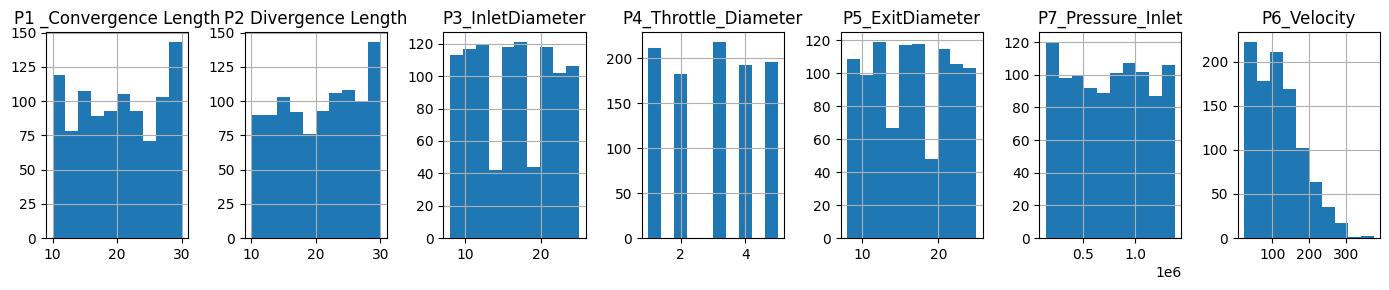

In [7]:
# Set the size of the figure
fig, axes = plt.subplots(1, 7, figsize=(14, 3))
data.hist(ax=axes) # Create histograms for all columns
plt.tight_layout() # Adjust the spacing between the subplots

In [8]:
## Normalisaion process i.e. scaling each variable by their minimum and maximum values so that all values 
## are within the range of 0 and 1.
# Normalisation can be useful for some models, i.e. in neural networks, when using gradient based descent 
# optimisation algorithms, can lead to better convergence, improve model accuracy and easy to determine the step size.
# Lets normalise the data using the MinMaxScaler, StardaScaler and Logarithmic scaling 
# https://medium.com/analytics-vidhya/eda-exploratory-data-analysis-d0fb1fd40cb9#:~:text=Feature%20scaling%20(also%20known%20as,while%20using%20machine%20learning%20algorithms.


<Axes: ylabel='Count'>

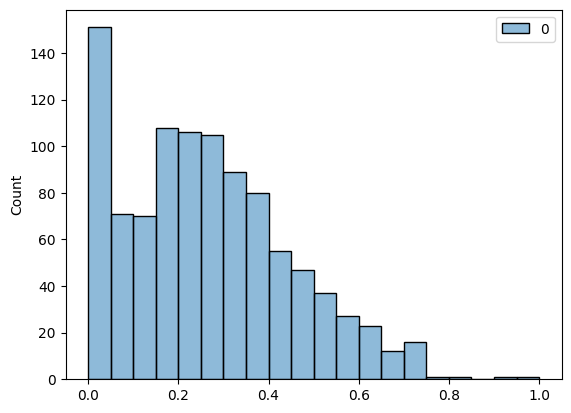

In [9]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler, FunctionTransformer

scaler_minmax = MinMaxScaler()

dataminmax=scaler_minmax.fit_transform(data.P6_Velocity.values.reshape(-1,1))
sns.histplot(dataminmax, kde=False)

<Axes: ylabel='Count'>

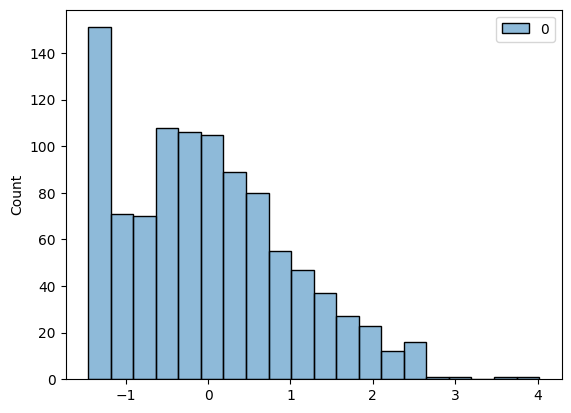

In [10]:
scaler_standard = StandardScaler()
data_scaler_standard=scaler_standard.fit_transform(data.P6_Velocity.values.reshape(-1,1))
sns.histplot(data_scaler_standard, kde=False)

<Axes: ylabel='Count'>

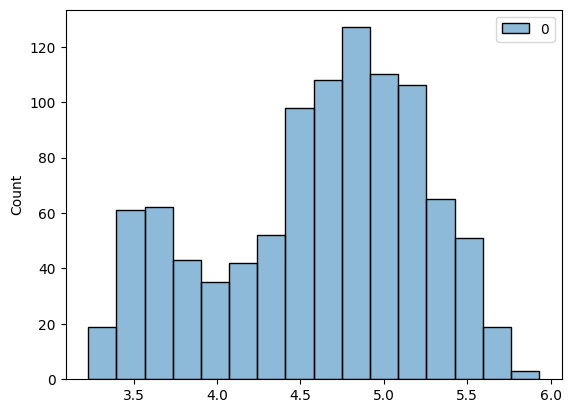

In [11]:

scaler_log = FunctionTransformer(np.log1p, validate=True)

data_scaler_log=scaler_log.fit_transform(data.P6_Velocity.values.reshape(-1,1))
sns.histplot(data_scaler_log, kde=False)

### Visualise the velocity data distribution using box plot.

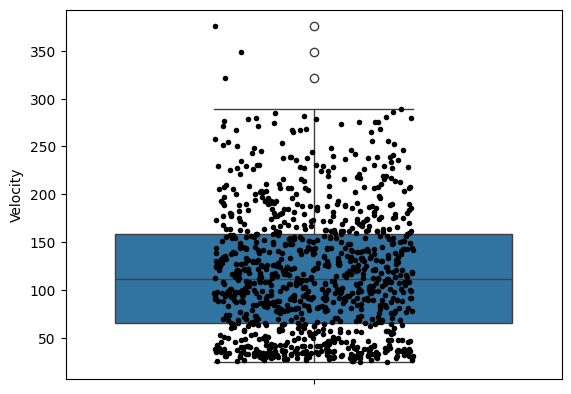

In [14]:
# Skip the last two columns
data_subset = data.iloc[:, 7]

# Create a box plot with individual data points
fix, ax = plt.subplots()
sns.boxplot(data=data_subset, ax=ax)
sns.stripplot(data=data_subset, color="black", size=4, jitter=0.2, ax=ax)
plt.ylabel('Velocity')
plt.show()

# Estimate the quantiles in the data and IQR scoring techniques

In [16]:
Q1 = data_subset.quantile(0.25)
Q3 = data_subset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

92.38952300000001


In [19]:
# Calculate the lower and upper boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
# Let's focus on the velocity column
lower_bound_V = lower_bound#[6]
upper_bound_V = upper_bound#[6]

# Identify outliers
outliers = data[(data.P6_Velocity < lower_bound_V) | (data.P6_Velocity > upper_bound_V)]
outliers = outliers.iloc[:,[0,-1]] # remove all columns other than P6_Velocity and Name
print(outliers)

       Name  P6_Velocity
101  DP 101    321.67303
157  DP 157    349.31204
830  DP 830    375.66592


Now  use '.corr' in Pandas to calculate teh pairwise correlation (resulting in a coefficient) between two columns (variables) in the dataset. The aim is to displace the Pearson correlation coefficient
i.e 1 shows stron positive correlation and -1 the opposite

this info can assist in understading dependencies, patterns and transform the data for better ML models.

<Axes: >

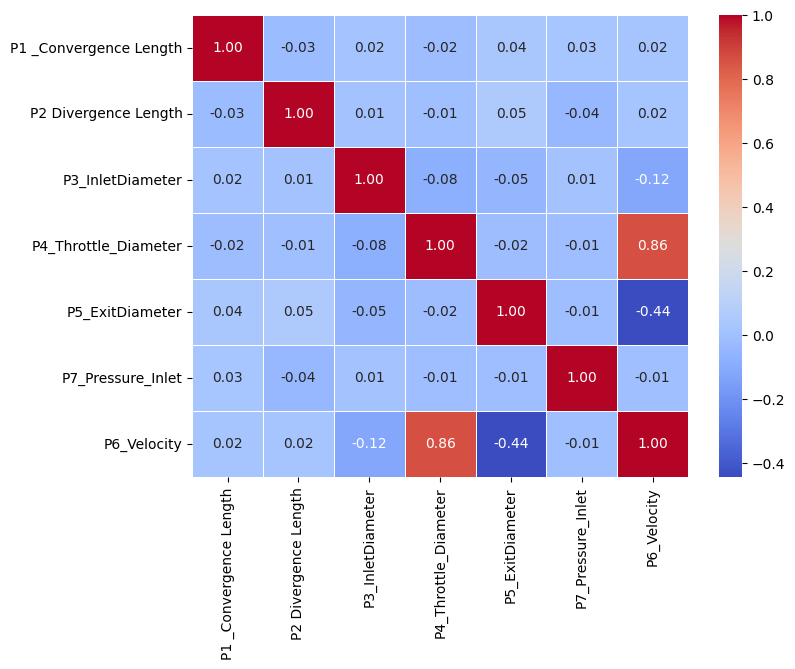

In [32]:
#Calculate the pearson correlation coefficient
correlation_matrix = data.iloc[:,1:].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

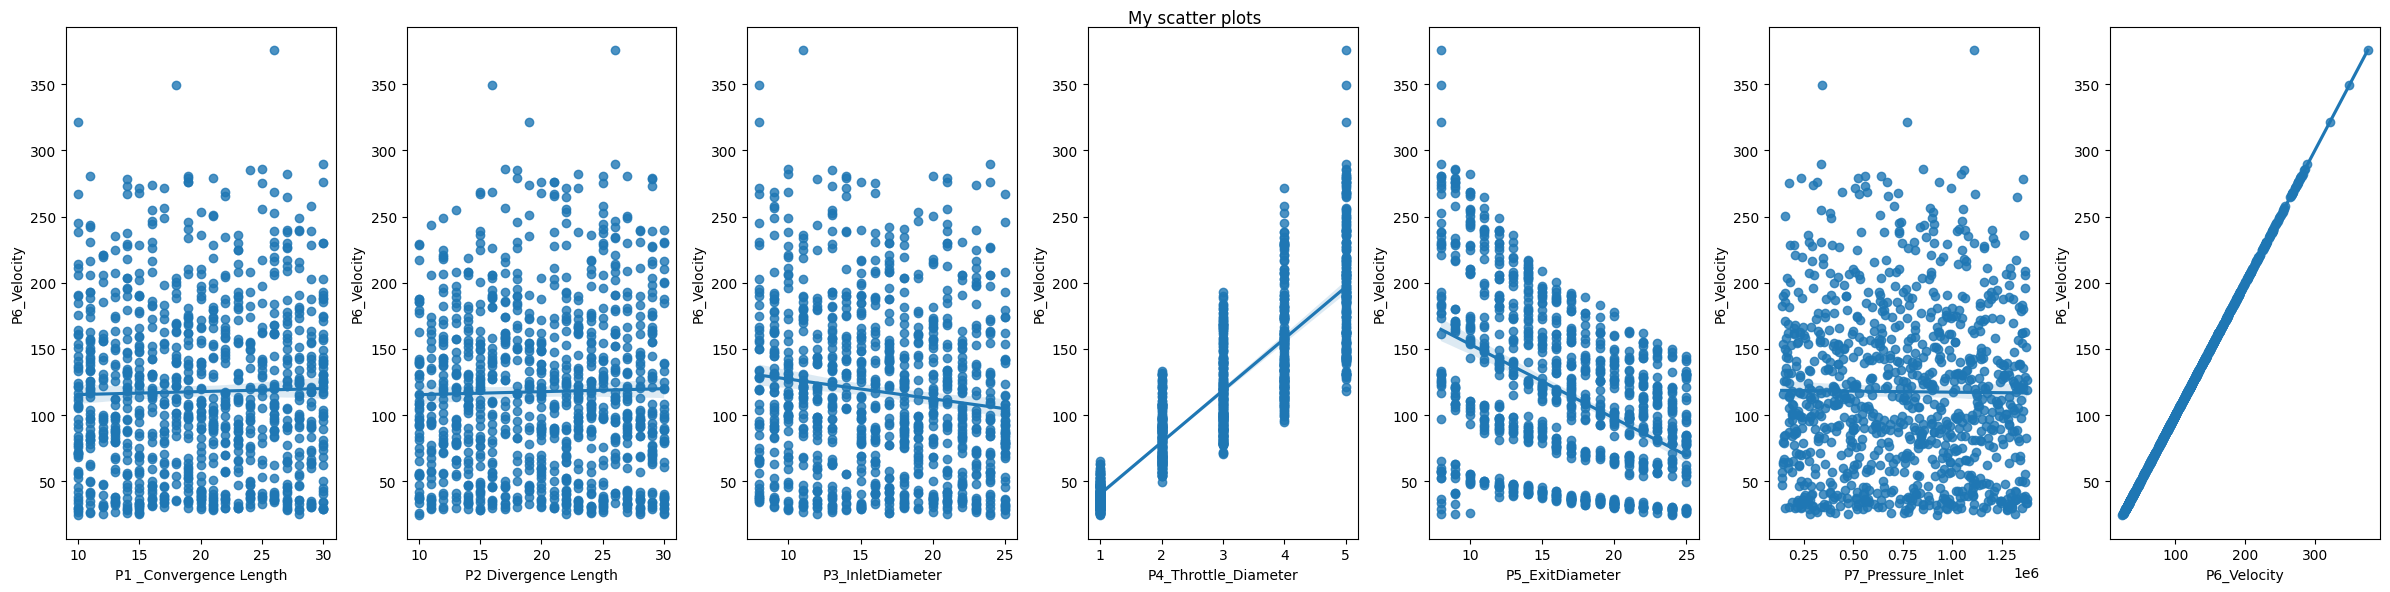

In [34]:
fig, ax = plt.subplots(1, 7, figsize=(24, 6))

for i, col in enumerate(data.columns[1:]):
    #random_df.plot(kind='scatter', x=col, y='MEDV', ax=ax[i])
    sns.regplot(x=data[col], y=data['P6_Velocity'], ax=ax[i])

fig.suptitle('My scatter plots')
plt.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
#plt.clf()
plt.close()